# Étude numérique de l'action d'un filtre sur un signal périodique

In [19]:
import numpy as np
import matplotlib.pyplot as plt

N=100   # Nombre d'harmoniques utilisées dans le calcul
w0=1.0   # La pulsation fondamentale du signal

On commence par créer la liste des amplitudes et des phases des harmoniques d'un signal carré. Pour ce type de signal, les amplitudes $a_n$ et les phases $\varphi_n$ sont
$$ a_n = 
  \begin{cases}
    \frac{1}{n} \quad \text{si $n$ est impair} \\
    0 \quad \text{si $n$ est pair}
  \end{cases} \quad \text{et $\varphi_n = \frac{\pi}{2}$ }
 $$

In [20]:
ampl = np.array([0]+[(n%2==1)*1/n for n in range(1,N+1)])
phi = np.zeros(N+1)+np.pi/2

La fonction ``signal`` prend en argument une liste ``ampl`` d'amplitudes d'harmoniques, une liste ``phi`` de phases à l'origine et une liste ``t`` de temps et renvoie la liste des valeurs du signal aux temps ``t``

In [11]:
def signal(ampl, phi, t):
    harmo = np.array([ampl[n]*np.cos((n*w0*t+phi[n])) for n in range(1, N+1)])
    return ampl[0] + np.sum(harmo, axis=0)

La fonction ``filtre_pb1(ampl, phi, wc)`` simule l'effet d'un filtre passe-bas d'ordre 1, de pulsation de coupure ``wc``, sur le signal dont les harmoniques ont des amplitudes définies par la liste ``ampl`` et des phases à l'origine définies par la liste ``phi``

La fonction de transfert d'un filtre passe-bas d'ordre 1 est 
$$ \underline{H}(\omega) = \frac{1}{1+j\frac{\omega}{\omega_c}}$$

Le gain est 
$$ G = |\underline{H}(\omega)| = \frac{1}{\sqrt{1+\left(\frac{\omega}{\omega_c}\right)^2}}$$

et le déphasage entre la sortie et l'entrée est
$$ \Delta \varphi = -\arctan\left(\frac{\omega}{\omega_c}\right)$$

In [12]:
def filtre_pb1(ampl, phi, wc):
    lw = np.array([n*w0 for n in range(N+1)])  # Liste des valeurs de ω
    ampl_s = ampl * 1/np.sqrt(1+(lw/wc)**2)    # Calcul des nouvelles amplitudes
    phi_s = phi - np.arctan(lw/wc)             # Calcul des nouveaux déphasages à l'origine
    return ampl_s, phi_s

La fonction ``filtre_ph1(ampl, phi, wc)`` simule l'effet d'un filtre passe-haut d'ordre 1, de pulsation de coupure ``wc``, sur le signal dont les harmoniques ont des amplitudes définies par la liste ``ampl`` et des phases à l'origine définies par la liste ``phi``


La fonction de transfert d'un filtre passe-haut d'ordre 1 est 
$$ \underline{H}(\omega) = \frac{1}{1-j\frac{\omega_c}{\omega}}$$

Le gain est 
$$ G = |\underline{H}(\omega)| = \frac{1}{\sqrt{1+\left(\frac{\omega_c}{\omega}\right)^2}}$$

et le déphasage entre la sortie et l'entrée est
$$ \Delta \varphi = \arctan\left(\frac{\omega_c}{\omega}\right)$$

In [13]:
def filtre_ph1(ampl, phi, wc):
    lw = np.array([n*w0 for n in range(N+1)])  # Liste des valeurs de ω
    lw[0] = 1e-15                              # Évite de diviser par 0
    ampl_s = ampl * 1/np.sqrt(1+(wc/lw)**2)    # Calcul des nouvelles amplitudes
    phi_s = phi + np.arctan(wc/lw)             # Calcul des nouveaux déphasages à l'origine
    return ampl_s, phi_s

On crée une liste de temps et le signal de départ

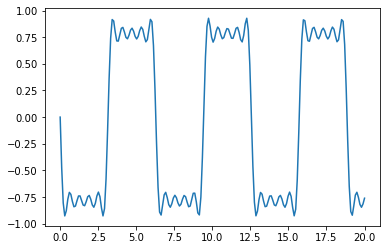

In [18]:
t = np.linspace(0, 20, 200)
s = signal(ampl, phi, t)
plt.plot(t,s)
plt.show()

Puis on applique un filtre passe-haut de pulsation de coupure $\omega_c = \omega_0$ et on affiche le signal d'origine ainsi que le signal filtré

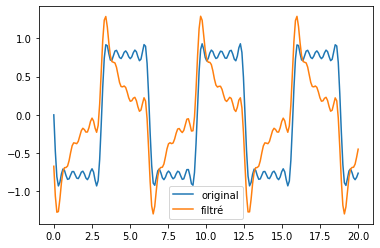

In [15]:
plt.clf()
ampl_f, phi_f = filtre_ph1(ampl, phi, w0)
s_f = signal(ampl_f, phi_f, t)
plt.plot(t,s, label='original')
plt.plot(t,s_f, label='filtré')
plt.legend()
plt.show()

On peut observer l'effet intégrateur du filtre passe-bas, lorsque la pulsation de coupure est beaucoup plus petite que la pulsation du signal. 

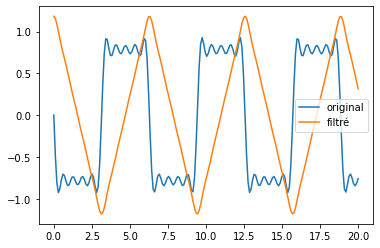

In [16]:
plt.clf()
ampl_f, phi_f = filtre_pb1(ampl, phi, w0/100)
s_f = signal(ampl_f, phi_f, t)
plt.plot(t,s,label='original')
plt.plot(t,100*s_f,label='filtré')
plt.legend()
plt.show()

On peut maintenant faire passer le signal filtré précédent dans un filtre passe-haut de pulsation de coupure bien supérieure à la pulsation du signal pour voir l'effet intégrateur du filtre passe-haut

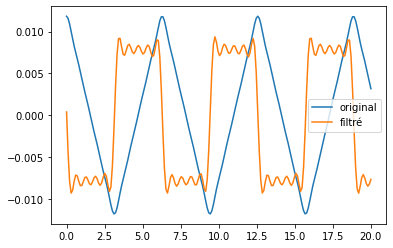

In [17]:
plt.clf()
ampl_f2, phi_f2 = filtre_ph1(ampl_f, phi_f, w0*100)
s_f2 = signal(ampl_f2, phi_f2, t)
plt.plot(t,s_f,label='original')
plt.plot(t,100*s_f2,label='filtré')
plt.legend()
plt.show()